In [219]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [221]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/mushroom_dataset.csv', sep=';')
pd.set_option('display.max_columns', None)
df.head()


,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,17.09,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,18.19,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,17.74,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,15.98,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,17.20,s,y,w,u,w,t,p,NaN,d,w


In [222]:
print(df.shape)
df.describe()

(61069, 21)


,cap-diameter,stem-height,stem-width
count,61069.000000,61069.000000,61069.000000
mean,6.733854,6.581538,12.149410
std,5.264845,3.370017,10.035955
min,0.380000,0.000000,0.000000
25%,3.480000,4.640000,5.210000
50%,5.860000,5.950000,10.190000
75%,8.540000,7.740000,16.570000
max,62.340000,33.920000,103.910000


In [223]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-surface           46949 non-null  object 
 4   cap-color             61069 non-null  object 
 5   does-bruise-or-bleed  61069 non-null  object 
 6   gill-attachment       51185 non-null  object 
 7   gill-spacing          36006 non-null  object 
 8   gill-color            61069 non-null  object 
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-root             9531 non-null   object 
 12  stem-surface          22945 non-null  object 
 13  stem-color            61069 non-null  object 
 14  veil-type             3177 non-null   object 
 15  veil-color         

In [224]:
df.isnull().sum()

,0
class,0
cap-diameter,0
cap-shape,0
cap-surface,14120
cap-color,0
does-bruise-or-bleed,0
gill-attachment,9884
gill-spacing,25063
gill-color,0
stem-height,0


In [225]:
df.isnull().mean()*100

,0
class,0.000000
cap-diameter,0.000000
cap-shape,0.000000
cap-surface,23.121387
cap-color,0.000000
does-bruise-or-bleed,0.000000
gill-attachment,16.184971
gill-spacing,41.040462
gill-color,0.000000
stem-height,0.000000


In [226]:
# Set threshold
threshold = 40  # in percent

# Drop columns with more than 50% missing values
df = df.drop(columns=df.columns[df.isnull().mean() * 100 > threshold])


In [227]:
df.isnull().sum()

,0
class,0
cap-diameter,0
cap-shape,0
cap-surface,14120
cap-color,0
does-bruise-or-bleed,0
gill-attachment,9884
gill-color,0
stem-height,0
stem-width,0


In [229]:
from sklearn.impute import SimpleImputer

# Impute 'cap-surface' using most frequent (categorical)
cap_surface_imputer = SimpleImputer(strategy='most_frequent')
df['cap-surface'] = cap_surface_imputer.fit_transform(df[['cap-surface']]).ravel()

# Impute 'gill-attachment' using most frequent
gill_attach_imputer = SimpleImputer(strategy='most_frequent')
df['gill-attachment'] = gill_attach_imputer.fit_transform(df[['gill-attachment']]).ravel()

# Impute 'ring-type' using median or most_frequent (choose based on dtype)
if df['ring-type'].dtype in ['int64', 'float64']:
    ring_type_imputer = SimpleImputer(strategy='median')
else:
    ring_type_imputer = SimpleImputer(strategy='most_frequent')

df['ring-type'] = ring_type_imputer.fit_transform(df[['ring-type']]).ravel()


In [230]:
df = df.drop_duplicates()
df.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,p,15.26,x,g,o,f,e,w,16.95,17.09,w,t,g,d,w
1,p,16.60,x,g,o,f,e,w,17.99,18.19,w,t,g,d,u
2,p,14.07,x,g,o,f,e,w,17.80,17.74,w,t,g,d,w
3,p,14.17,f,h,e,f,e,w,15.77,15.98,w,t,p,d,w
4,p,14.64,x,h,o,f,e,w,16.53,17.20,w,t,p,d,w


Unique class values: ['p' 'e']


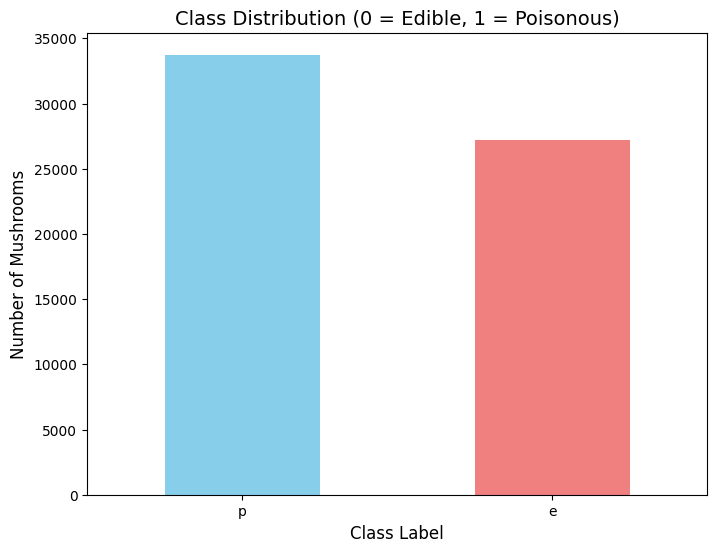


Class Distribution:
class
p    33742
e    27181
Name: count, dtype: int64


In [231]:
import matplotlib.pyplot as plt
# Check the unique values in the 'class' column
print("Unique class values:", df['class'].unique())

# Count class distribution
class_counts = df['class'].value_counts()

# Plot the class distribution
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Class Distribution (0 = Edible, 1 = Poisonous)', fontsize=14)
plt.xlabel('Class Label', fontsize=12)
plt.ylabel('Number of Mushrooms', fontsize=12)
plt.xticks(rotation=0)
plt.show()

# Print the actual counts
print("\nClass Distribution:")
print(class_counts)


In [232]:
df.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,p,15.26,x,g,o,f,e,w,16.95,17.09,w,t,g,d,w
1,p,16.60,x,g,o,f,e,w,17.99,18.19,w,t,g,d,u
2,p,14.07,x,g,o,f,e,w,17.80,17.74,w,t,g,d,w
3,p,14.17,f,h,e,f,e,w,15.77,15.98,w,t,p,d,w
4,p,14.64,x,h,o,f,e,w,16.53,17.20,w,t,p,d,w


In [233]:
dfd=df.copy()
##Selecting numerical features
numerical_data = dfd.select_dtypes(include='number')

#append the features of numerical_data to list
numerical_features=numerical_data.columns.tolist()

print(f'There are {len(numerical_features)} numerical features:', '\n')
print(numerical_features)

There are 3 numerical features: 

['cap-diameter', 'stem-height', 'stem-width']


In [234]:
#Selecting categoricalfeatures
categorical_data=dfd.select_dtypes(include= 'object')

#append the features of categorical_data to list
categorical_features=categorical_data.columns.tolist()

print(f'There are {len(categorical_features)} categorical features:', '\n')
print(categorical_features)

There are 12 categorical features: 

['class', 'cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed', 'gill-attachment', 'gill-color', 'stem-color', 'has-ring', 'ring-type', 'habitat', 'season']


In [235]:
#catagorical to numerical

from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
for feature in categorical_features:
    dfd[feature] = enc.fit_transform(dfd[feature])

In [236]:
dfd.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,1,15.26,6,2,6,0,2,10,16.95,17.09,11,1,2,0,3
1,1,16.60,6,2,6,0,2,10,17.99,18.19,11,1,2,0,2
2,1,14.07,6,2,6,0,2,10,17.80,17.74,11,1,2,0,3
3,1,14.17,2,3,1,0,2,10,15.77,15.98,11,1,5,0,3
4,1,14.64,6,3,6,0,2,10,16.53,17.20,11,1,5,0,3


There are 15 numerical features:

['class', 'cap-diameter', 'cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed', 'gill-attachment', 'gill-color', 'stem-height', 'stem-width', 'stem-color', 'has-ring', 'ring-type', 'habitat', 'season']


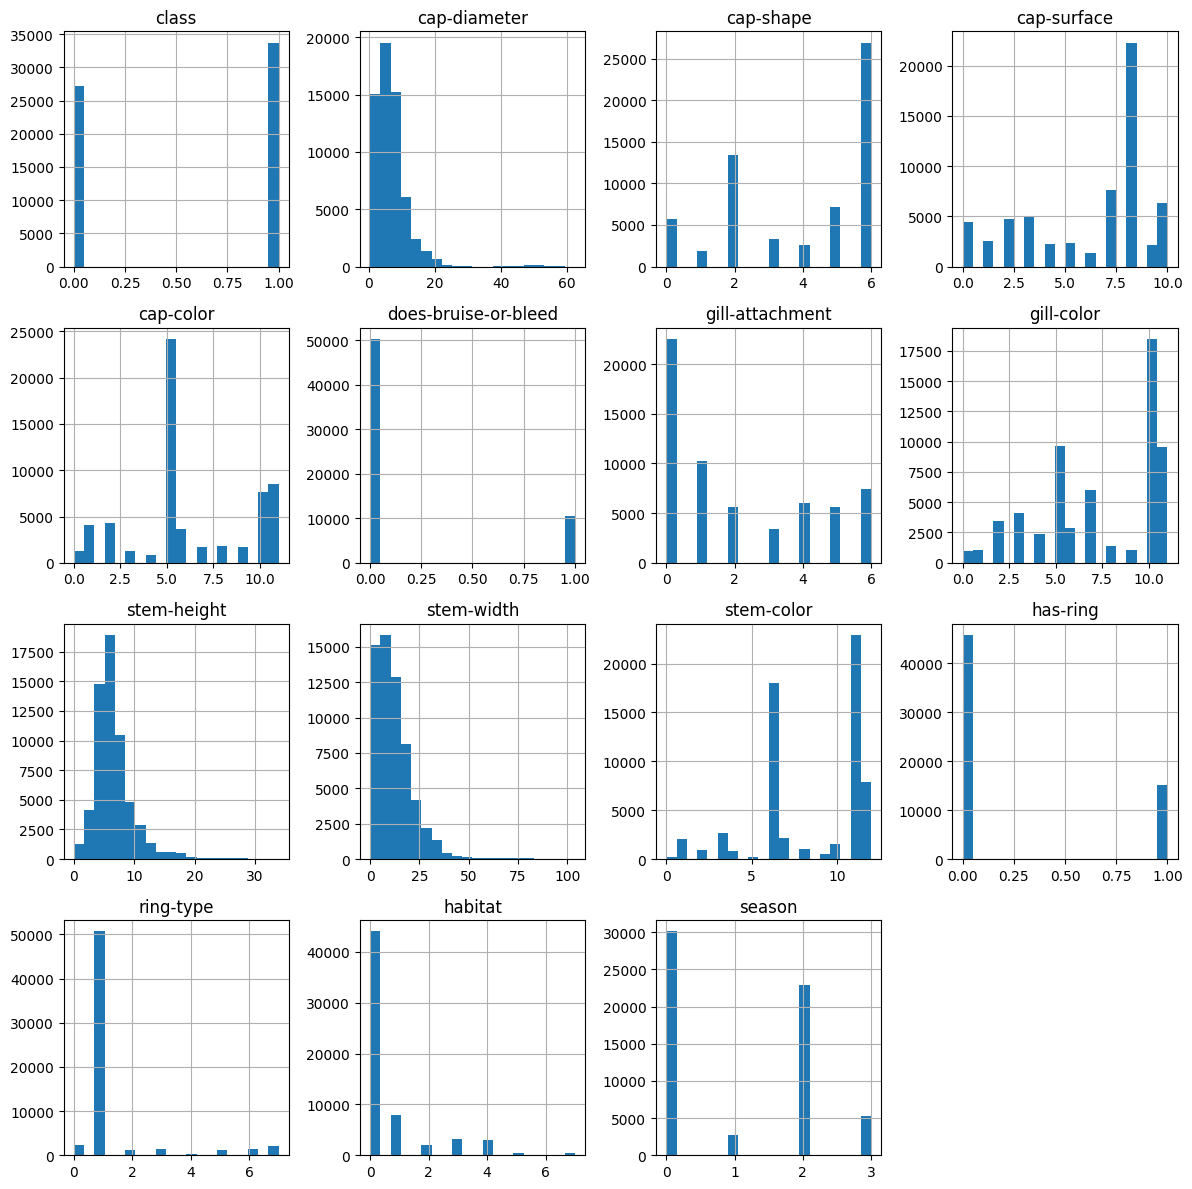

In [237]:
# Select numerical features
numerical_data = dfd.select_dtypes(include='number')

# Store the names of numerical features in a list
numerical_features = numerical_data.columns.tolist()

# Print number of numerical features and their names
print(f'There are {len(numerical_features)} numerical features:\n')
print(numerical_features)

# Plot histograms for numerical features
numerical_data.hist(figsize=(12, 12), bins=20)
plt.tight_layout()
plt.show()

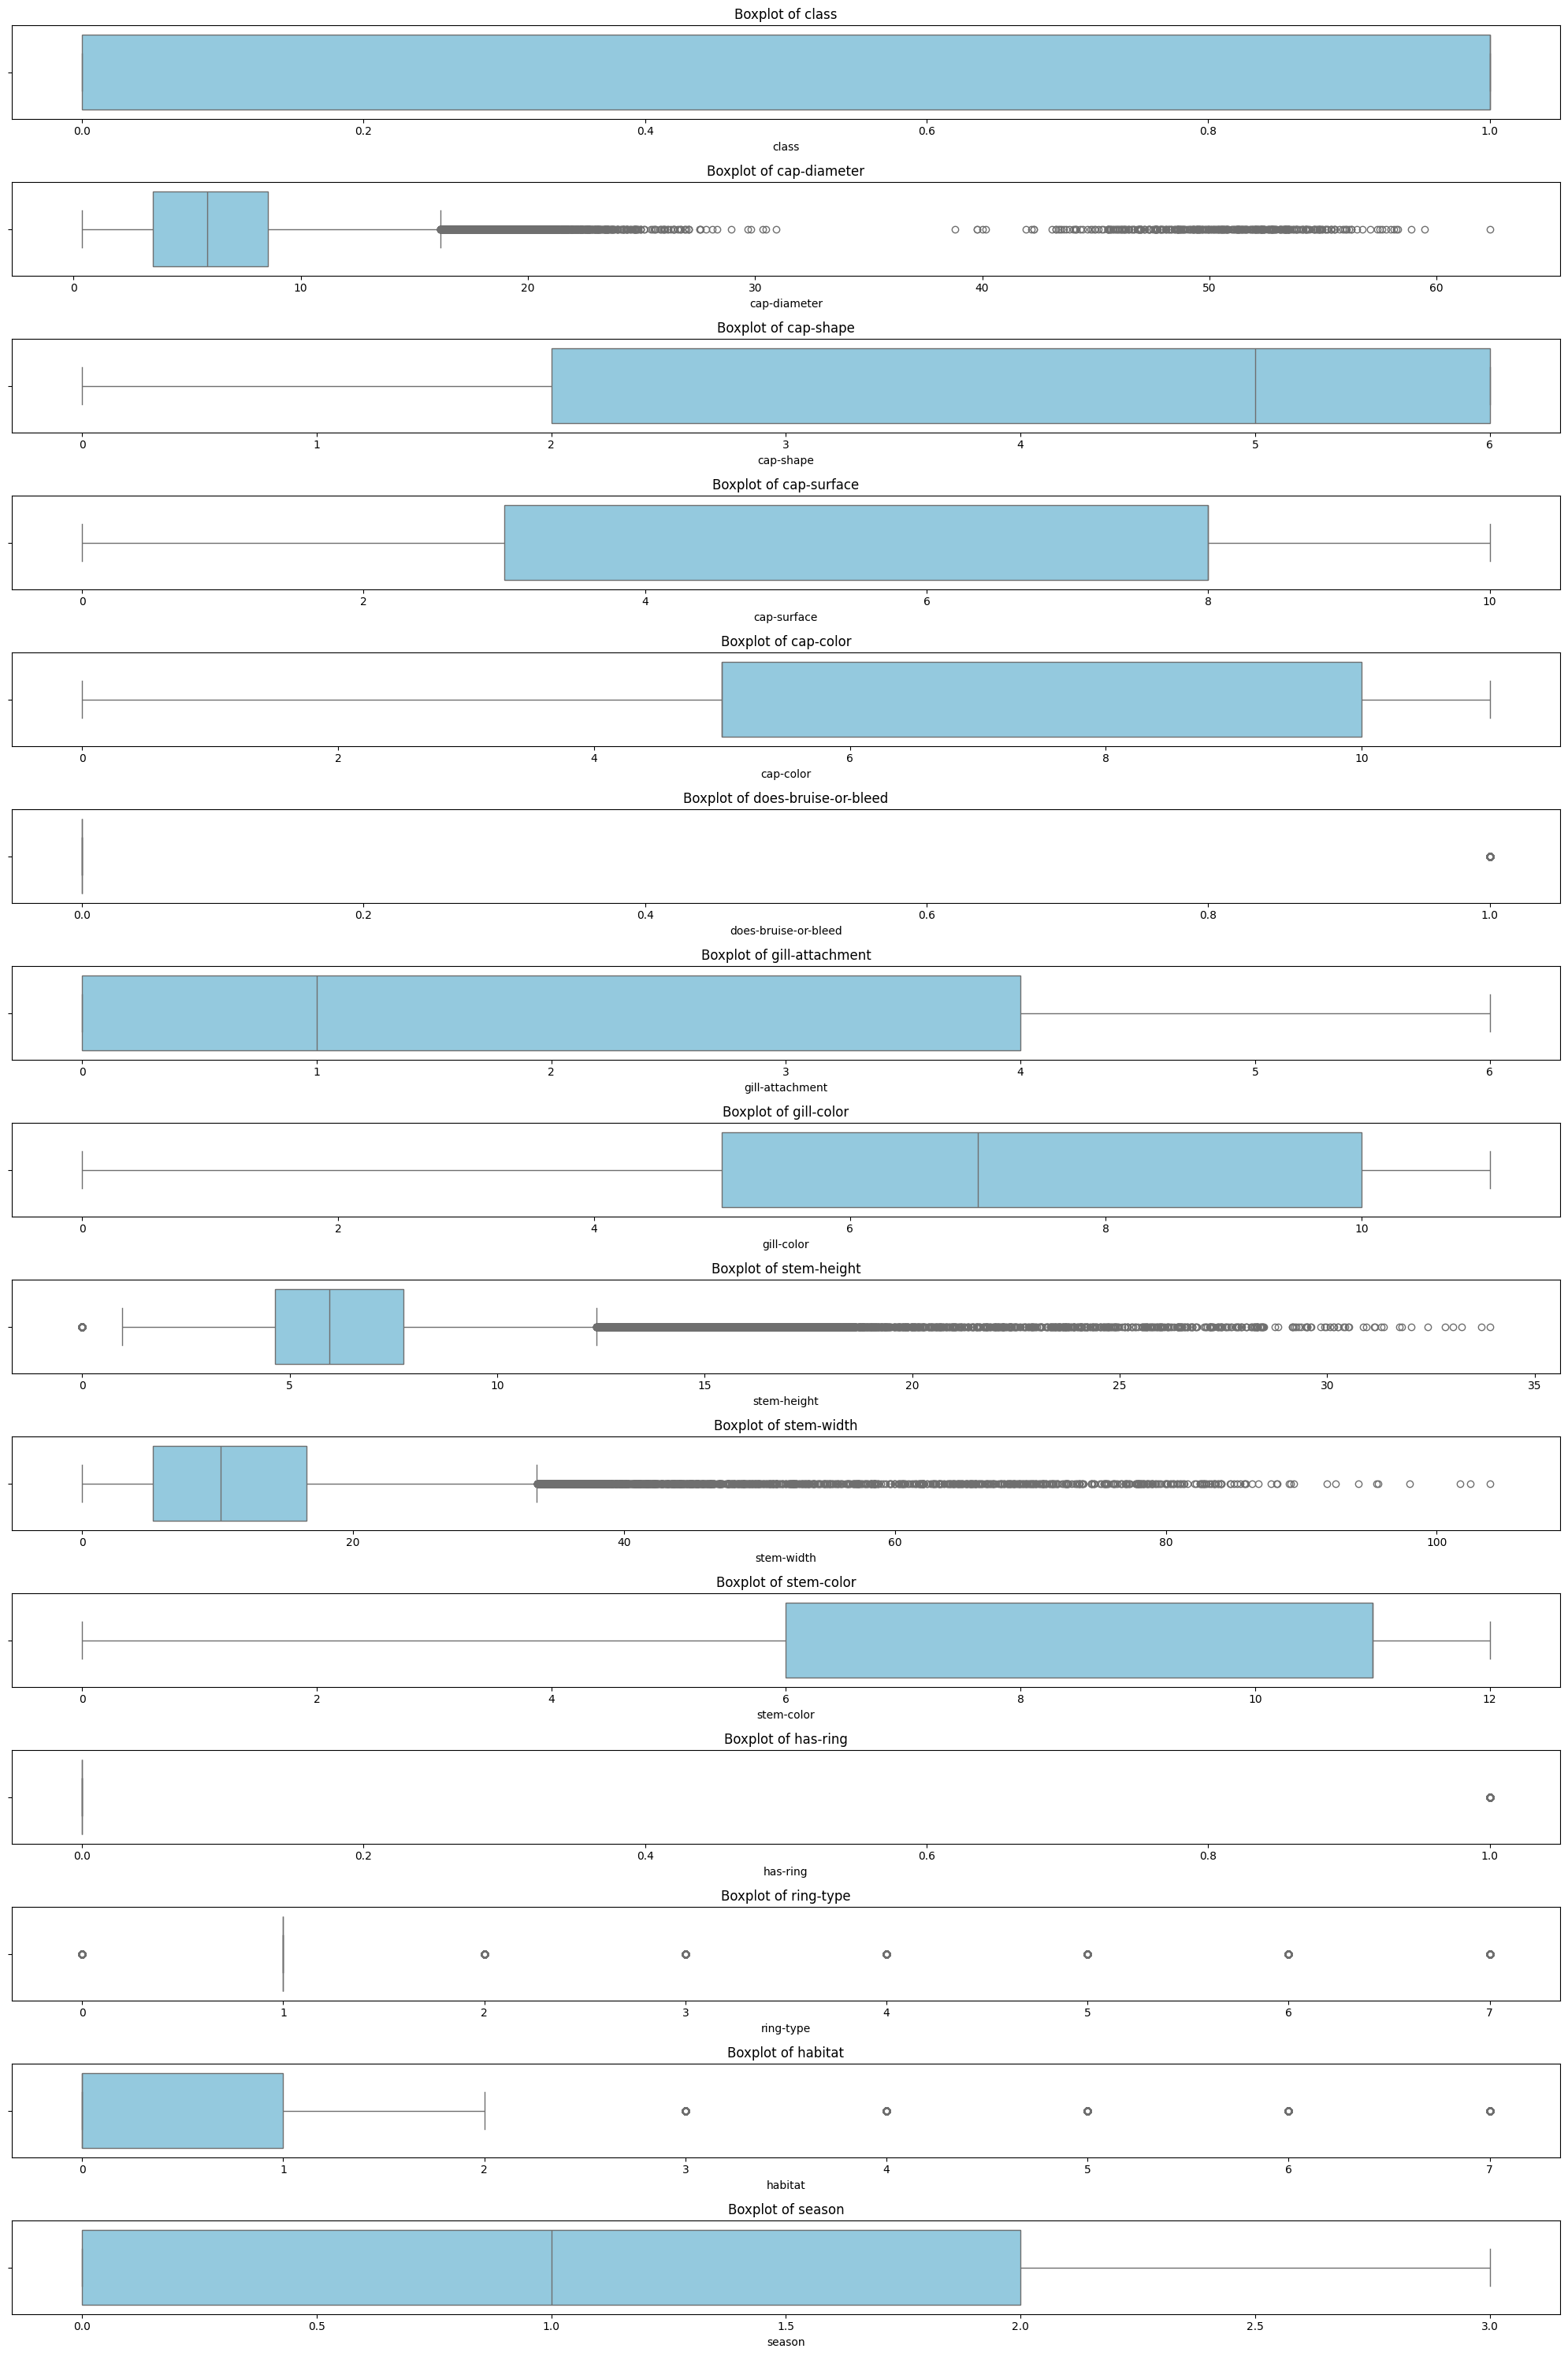

In [238]:
import seaborn as sns

# Select only numeric columns
numeric_cols = dfd.select_dtypes(include=['int64', 'float64']).columns

# Set up the figure size
plt.figure(figsize=(20, 30))

# Create boxplots for each numerical column
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols), 1, i)
    sns.boxplot(x=dfd[col], color='skyblue')
    plt.title(f'Boxplot of {col}', fontsize=12)
    plt.tight_layout()

plt.show()


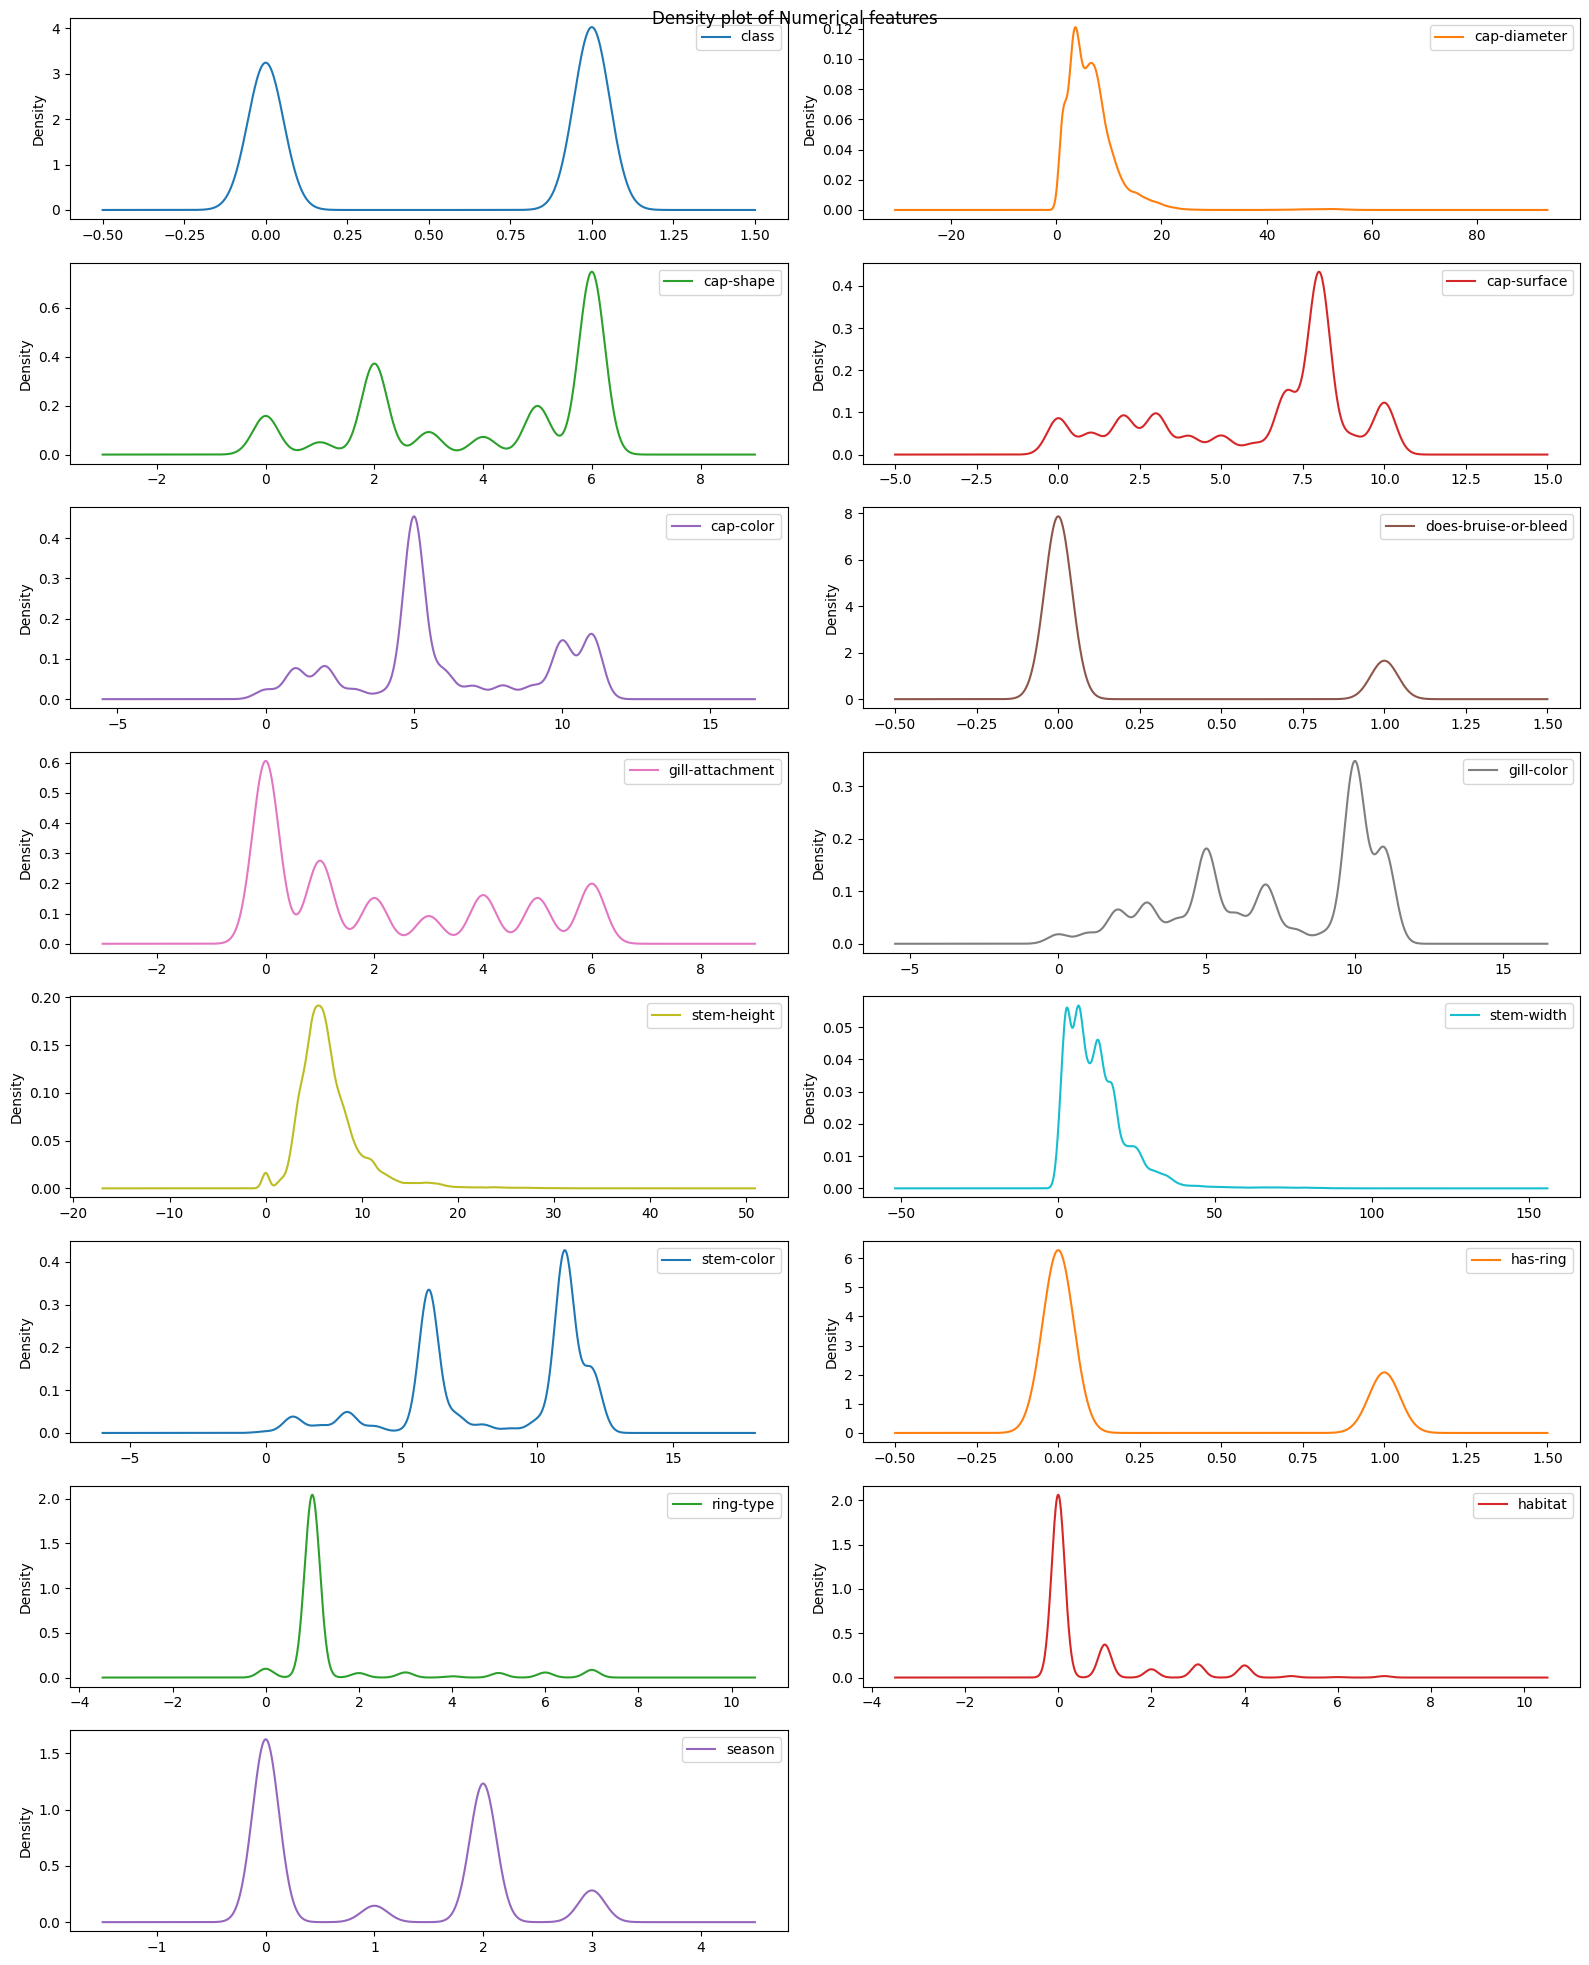

In [239]:
numerical_data.plot(
    kind='density',
    figsize=(16, 20),
    subplots=True,
    layout=(8, 2),  # 8 rows × 2 columns = 16 plots
    title="Density plot of Numerical features",
    sharex=False
)
plt.tight_layout()
plt.show()


In [240]:
dfd_corr = dfd.corr()
dfd_corr

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
class,1.000000,-0.180027,-0.105437,-0.026357,0.028259,-0.018929,-0.095828,-0.058439,-0.118079,-0.195303,-0.091048,0.058480,0.093088,-0.040917,-0.055143
cap-diameter,-0.180027,1.000000,0.103308,0.067314,0.040796,0.178872,0.172210,0.220467,0.421718,0.695047,0.005678,0.076451,0.035590,-0.126680,0.038099
cap-shape,-0.105437,0.103308,1.000000,-0.067492,0.015317,0.191394,0.047063,0.114667,0.032410,0.156399,0.006814,0.035628,0.146625,-0.125380,-0.026740
cap-surface,-0.026357,0.067314,-0.067492,1.000000,0.113804,-0.095043,0.028756,-0.025839,0.073466,0.060818,0.119182,0.098034,-0.050464,0.069077,0.011666
cap-color,0.028259,0.040796,0.015317,0.113804,1.000000,0.009770,0.009104,0.133122,-0.014732,-0.001833,0.263227,0.069970,-0.012218,0.030795,0.009617
does-bruise-or-bleed,-0.018929,0.178872,0.191394,-0.095043,0.009770,1.000000,0.046568,0.017397,0.074825,0.182553,-0.027221,0.018790,0.000356,-0.103344,-0.050738
gill-attachment,-0.095828,0.172210,0.047063,0.028756,0.009104,0.046568,1.000000,0.099768,0.072960,0.230488,0.003589,-0.143989,-0.112033,-0.059993,-0.034916
gill-color,-0.058439,0.220467,0.114667,-0.025839,0.133122,0.017397,0.099768,1.000000,0.153005,0.111064,0.145376,-0.056671,-0.009918,-0.077377,-0.009767
stem-height,-0.118079,0.421718,0.032410,0.073466,-0.014732,0.074825,0.072960,0.153005,1.000000,0.433214,0.130427,0.280723,0.191361,-0.023065,-0.018665
stem-width,-0.195303,0.695047,0.156399,0.060818,-0.001833,0.182553,0.230488,0.111064,0.433214,1.000000,0.052755,-0.002101,-0.010869,-0.111615,0.015511


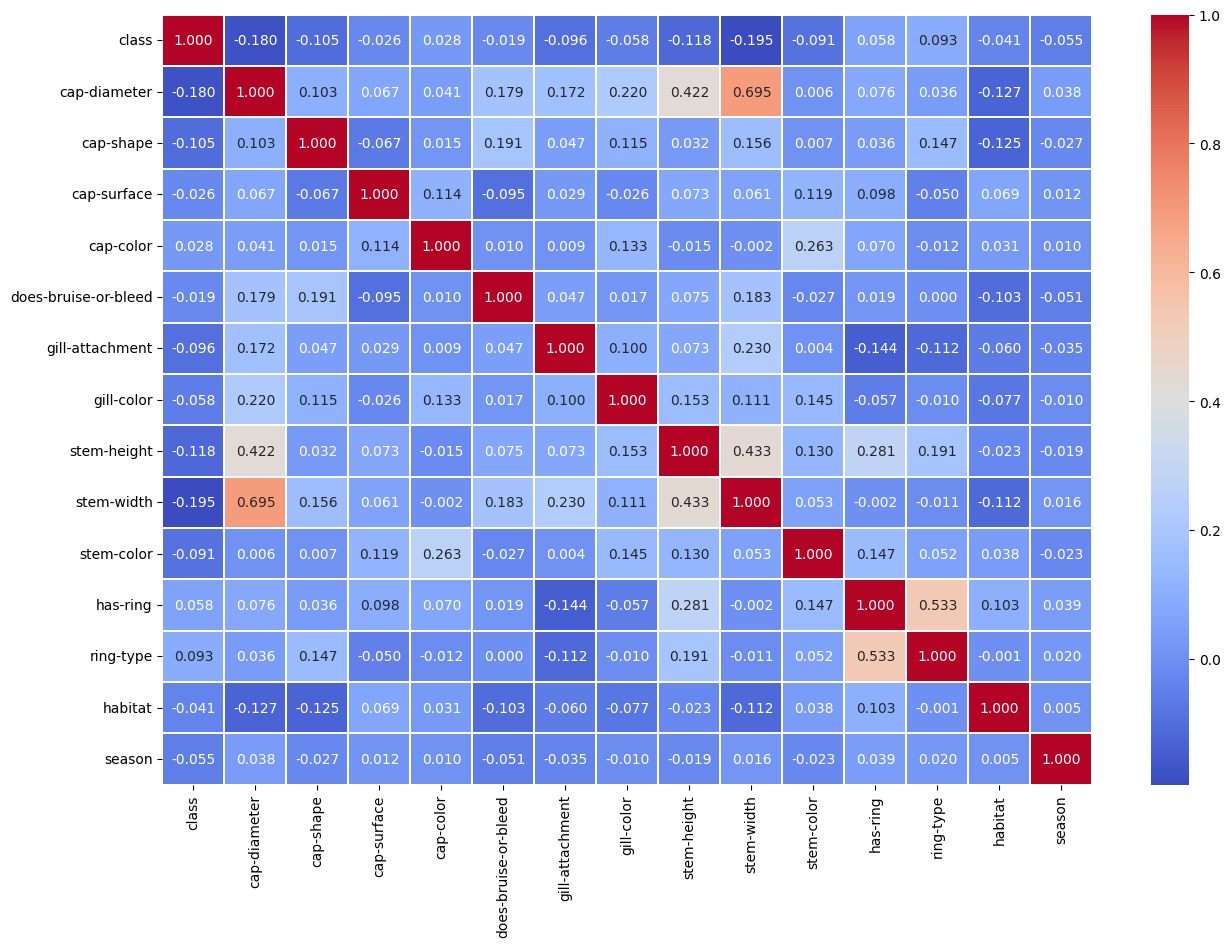

In [241]:
plt.figure(figsize=(15, 10))
sns.heatmap(dfd_corr, annot=True, cmap='coolwarm', fmt='.3f', linewidths=0.3)
plt.show()

In [150]:
df0 = df.copy()

In [151]:
#Selecting categoricalfeatures
categorical_data=df0.select_dtypes(include= 'object')

#append the features of categorical_data to list
categorical_features=categorical_data.columns.tolist()

print(f'There are {len(categorical_features)} categorical features:', '\n')
print(categorical_features)

from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
for feature in categorical_features:
    df0[feature] = enc.fit_transform(df0[feature])

There are 9 numerical features: 

['cap-shape', 'cap-surface', 'cap-color', 'gill-attachment', 'gill-color', 'stem-color', 'ring-type', 'habitat', 'season']


In [153]:
from sklearn.model_selection import train_test_split
X = df0.drop('class', axis=1)
y = df0['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [154]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Logistic Regression
log_model = LogisticRegression(max_iter=5000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# KNN
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)


# Define the neural network model
nn_model = Sequential()

# Add 8 layers with alternating ReLU activations
nn_model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))  # Layer 1
nn_model.add(Dense(32, activation='relu'))  # Layer 2
nn_model.add(Dense(1, activation='sigmoid'))  # Output Layer

# Compile the model
nn_model.compile(loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model on the training data
nn_model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

# Predict the outcomes on the test set
y_pred_nn = (nn_model.predict(X_test) > 0.5).astype("int32")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.6706 - loss: 0.5856 - val_accuracy: 0.8101 - val_loss: 0.4012
Epoch 2/5
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8412 - loss: 0.3635 - val_accuracy: 0.8561 - val_loss: 0.3213
Epoch 3/5
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8999 - loss: 0.2539 - val_accuracy: 0.9251 - val_loss: 0.1982
Epoch 4/5
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9271 - loss: 0.1889 - val_accuracy: 0.9134 - val_loss: 0.2020
Epoch 5/5
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9434 - loss: 0.1528 - val_accuracy: 0.9535 - val_loss: 0.1301
572/572 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [155]:
from sklearn.metrics import accuracy_score
# Accuracy comparison
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Neural Network Accuracy:",accuracy_score(y_test, y_pred_nn))

Logistic Regression Accuracy: 0.6200689391037917
Random Forest Accuracy: 0.9984680199157411
KNN Accuracy: 0.9955682004705367
Neural Network Accuracy: 0.9535481753022925


In [156]:
from sklearn.metrics import classification_report

print("Logistic Regression:")
print(classification_report(y_test, y_pred_log))

print("Random Forest:")
print(classification_report(y_test, y_pred_rf))

print("KNN:")
print(classification_report(y_test, y_pred_knn))

print("Nural Network:")
print(classification_report(y_test, y_pred_nn))

Logistic Regression:
              precision    recall  f1-score   support

           0       0.60      0.46      0.52      8150
           1       0.63      0.75      0.69     10127

    accuracy                           0.62     18277
   macro avg       0.61      0.60      0.60     18277
weighted avg       0.62      0.62      0.61     18277

Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8150
           1       1.00      1.00      1.00     10127

    accuracy                           1.00     18277
   macro avg       1.00      1.00      1.00     18277
weighted avg       1.00      1.00      1.00     18277

KNN:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      8150
           1       1.00      1.00      1.00     10127

    accuracy                           1.00     18277
   macro avg       1.00      1.00      1.00     18277
weighted avg       1.00      1.00

over acc


In [91]:
##Selecting numerical features
numerical_data = df.select_dtypes(include='number')

#append the features of numerical_data to list
numerical_features=numerical_data.columns.tolist()

print(f'There are {len(numerical_features)} numerical features:', '\n')
print(numerical_features)

There are 3 numerical features: 

['cap-diameter', 'stem-height', 'stem-width']


In [92]:
from sklearn.impute import SimpleImputer

# Impute 'cap-surface' using most frequent (categorical)
cap_surface_imputer = SimpleImputer(strategy='most_frequent')
df['cap-surface'] = cap_surface_imputer.fit_transform(df[['cap-surface']]).ravel()

# Impute 'gill-attachment' using most frequent
gill_attach_imputer = SimpleImputer(strategy='most_frequent')
df['gill-attachment'] = gill_attach_imputer.fit_transform(df[['gill-attachment']]).ravel()

# Impute 'ring-type' using median or most_frequent (choose based on dtype)
if df['ring-type'].dtype in ['int64', 'float64']:
    ring_type_imputer = SimpleImputer(strategy='median')
else:
    ring_type_imputer = SimpleImputer(strategy='most_frequent')

df['ring-type'] = ring_type_imputer.fit_transform(df[['ring-type']]).ravel()


In [93]:
df.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,p,15.26,x,g,o,f,e,w,16.95,17.09,w,t,g,d,w
1,p,16.60,x,g,o,f,e,w,17.99,18.19,w,t,g,d,u
2,p,14.07,x,g,o,f,e,w,17.80,17.74,w,t,g,d,w
3,p,14.17,f,h,e,f,e,w,15.77,15.98,w,t,p,d,w
4,p,14.64,x,h,o,f,e,w,16.53,17.20,w,t,p,d,w


In [94]:
df.isnull().sum()

,0
class,0
cap-diameter,0
cap-shape,0
cap-surface,0
cap-color,0
does-bruise-or-bleed,0
gill-attachment,0
gill-color,0
stem-height,0
stem-width,0


In [95]:
#Selecting categoricalfeatures
categorical_data=df.select_dtypes(include= 'object')

#append the features of categorical_data to list
categorical_features=categorical_data.columns.tolist()

print(f'There are {len(categorical_features)} categorical features:', '\n')
print(categorical_features)

There are 12 categorical features: 

['class', 'cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed', 'gill-attachment', 'gill-color', 'stem-color', 'has-ring', 'ring-type', 'habitat', 'season']


In [96]:
df.nunique()

,0
class,2
cap-diameter,2571
cap-shape,7
cap-surface,11
cap-color,12
does-bruise-or-bleed,2
gill-attachment,7
gill-color,12
stem-height,2226
stem-width,4630


In [97]:
df.head()


,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,p,15.26,x,g,o,f,e,w,16.95,17.09,w,t,g,d,w
1,p,16.60,x,g,o,f,e,w,17.99,18.19,w,t,g,d,u
2,p,14.07,x,g,o,f,e,w,17.80,17.74,w,t,g,d,w
3,p,14.17,f,h,e,f,e,w,15.77,15.98,w,t,p,d,w
4,p,14.64,x,h,o,f,e,w,16.53,17.20,w,t,p,d,w


In [98]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [99]:
#catagorical to numerical
from sklearn.preprocessing import LabelEncoder

features=['class', 'does-bruise-or-bleed', 'has-ring']

enc = LabelEncoder()
for feature in features:
    df[feature] = enc.fit_transform(df[feature])

In [104]:
df.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,1,1.616820,x,g,o,0,e,w,3.082356,0.489669,w,1,g,d,w
1,1,1.871167,x,g,o,0,e,w,3.391996,0.599337,w,1,g,d,u
2,1,1.390945,x,g,o,0,e,w,3.335427,0.554473,w,1,g,d,w
3,1,1.409926,f,h,e,0,e,w,2.731032,0.379004,w,1,p,d,w
4,1,1.499137,x,h,o,0,e,w,2.957308,0.500636,w,1,p,d,w


In [105]:
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [106]:

# One-Hot Encoding for categorical columns with more than 2 unique values
one_hot_features = [
    'cap-shape', 'cap-surface', 'cap-color', 'gill-attachment',
    'gill-color', 'ring-type', 'habitat', 'season','stem-color'
]


# Apply One-Hot Encoding
df1 = df.copy()
df1 = pd.get_dummies(df, columns=one_hot_features)
# Convert all boolean columns to numerical 0s and 1s
df1 = df1.astype(int)

# Check the result
df1.head()

,class,cap-diameter,does-bruise-or-bleed,stem-height,stem-width,has-ring,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_o,cap-shape_p,cap-shape_s,cap-shape_x,cap-surface_d,cap-surface_e,cap-surface_g,cap-surface_h,cap-surface_i,cap-surface_k,cap-surface_l,cap-surface_s,cap-surface_t,cap-surface_w,cap-surface_y,cap-color_b,cap-color_e,cap-color_g,cap-color_k,cap-color_l,cap-color_n,cap-color_o,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y,gill-attachment_a,gill-attachment_d,gill-attachment_e,gill-attachment_f,gill-attachment_p,gill-attachment_s,gill-attachment_x,gill-color_b,gill-color_e,gill-color_f,gill-color_g,gill-color_k,gill-color_n,gill-color_o,gill-color_p,gill-color_r,gill-color_u,gill-color_w,gill-color_y,ring-type_e,ring-type_f,ring-type_g,ring-type_l,ring-type_m,ring-type_p,ring-type_r,ring-type_z,habitat_d,habitat_g,habitat_h,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w,season_a,season_s,season_u,season_w,stem-color_b,stem-color_e,stem-color_f,stem-color_g,stem-color_k,stem-color_l,stem-color_n,stem-color_o,stem-color_p,stem-color_r,stem-color_u,stem-color_w,stem-color_y
0,1,1,0,3,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,1,1,0,3,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,1,1,0,3,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
3,1,1,0,2,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,1,1,0,2,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0


In [107]:
df.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,1,1.616820,x,g,o,0,e,w,3.082356,0.489669,w,1,g,d,w
1,1,1.871167,x,g,o,0,e,w,3.391996,0.599337,w,1,g,d,u
2,1,1.390945,x,g,o,0,e,w,3.335427,0.554473,w,1,g,d,w
3,1,1.409926,f,h,e,0,e,w,2.731032,0.379004,w,1,p,d,w
4,1,1.499137,x,h,o,0,e,w,2.957308,0.500636,w,1,p,d,w


In [108]:
from sklearn.model_selection import train_test_split
X = df1.drop('class', axis=1)
y = df1['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [109]:
print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")

Training set size: (42646, 87)
Test set size: (18277, 87)


In [110]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Logistic Regression
log_model = LogisticRegression(max_iter=5000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# KNN
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)


# Define the neural network model
nn_model = Sequential()

# Add 8 layers with alternating ReLU activations
nn_model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))  # Layer 1
nn_model.add(Dense(32, activation='relu'))  # Layer 2
nn_model.add(Dense(1, activation='sigmoid'))  # Output Layer

# Compile the model
nn_model.compile(loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model on the training data
nn_model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

# Predict the outcomes on the test set
y_pred_nn = (nn_model.predict(X_test) > 0.5).astype("int32")


Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1333/1333 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8299 - loss: 0.3581 - val_accuracy: 0.9879 - val_loss: 0.0332
Epoch 2/5
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9908 - loss: 0.0269 - val_accuracy: 0.9906 - val_loss: 0.0202
Epoch 3/5
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9926 - loss: 0.0186 - val_accuracy: 0.9908 - val_loss: 0.0238
Epoch 4/5
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9935 - loss: 0.0161 - val_accuracy: 0.9918 - val_loss: 0.0196
Epoch 5/5
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9936 - loss: 0.0161 - val_accuracy: 0.9897 - val_loss: 0.0244
572/572 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [111]:
from sklearn.metrics import accuracy_score
# Accuracy comparison
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Neural Network Accuracy:",accuracy_score(y_test, y_pred_nn))

Logistic Regression Accuracy: 0.7694369973190348
Random Forest Accuracy: 0.9926136674508945
KNN Accuracy: 0.9925589538764568
Neural Network Accuracy: 0.9897138480056902


In [112]:
from sklearn.metrics import classification_report

print("Logistic Regression:")
print(classification_report(y_test, y_pred_log))

print("Random Forest:")
print(classification_report(y_test, y_pred_rf))

print("KNN:")
print(classification_report(y_test, y_pred_knn))

print("Nural Network:")
print(classification_report(y_test, y_pred_nn))

Logistic Regression:
              precision    recall  f1-score   support

           0       0.74      0.75      0.74      8150
           1       0.80      0.78      0.79     10127

    accuracy                           0.77     18277
   macro avg       0.77      0.77      0.77     18277
weighted avg       0.77      0.77      0.77     18277

Random Forest:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      8150
           1       0.99      0.99      0.99     10127

    accuracy                           0.99     18277
   macro avg       0.99      0.99      0.99     18277
weighted avg       0.99      0.99      0.99     18277

KNN:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      8150
           1       0.99      1.00      0.99     10127

    accuracy                           0.99     18277
   macro avg       0.99      0.99      0.99     18277
weighted avg       0.99      0.99

In [113]:
df.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,1,1.616820,x,g,o,0,e,w,3.082356,0.489669,w,1,g,d,w
1,1,1.871167,x,g,o,0,e,w,3.391996,0.599337,w,1,g,d,u
2,1,1.390945,x,g,o,0,e,w,3.335427,0.554473,w,1,g,d,w
3,1,1.409926,f,h,e,0,e,w,2.731032,0.379004,w,1,p,d,w
4,1,1.499137,x,h,o,0,e,w,2.957308,0.500636,w,1,p,d,w


In [115]:
df.nunique()

,0
class,2
cap-diameter,2571
cap-shape,7
cap-surface,11
cap-color,12
does-bruise-or-bleed,2
gill-attachment,7
gill-color,12
stem-height,2226
stem-width,4630


In [116]:
df2 = df.copy()

df2 = pd.get_dummies(df2, columns=['gill-attachment'])

In [117]:
df2.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season,gill-attachment_a,gill-attachment_d,gill-attachment_e,gill-attachment_f,gill-attachment_p,gill-attachment_s,gill-attachment_x
0,1,1.616820,x,g,o,0,w,3.082356,0.489669,w,1,g,d,w,False,False,True,False,False,False,False
1,1,1.871167,x,g,o,0,w,3.391996,0.599337,w,1,g,d,u,False,False,True,False,False,False,False
2,1,1.390945,x,g,o,0,w,3.335427,0.554473,w,1,g,d,w,False,False,True,False,False,False,False
3,1,1.409926,f,h,e,0,w,2.731032,0.379004,w,1,p,d,w,False,False,True,False,False,False,False
4,1,1.499137,x,h,o,0,w,2.957308,0.500636,w,1,p,d,w,False,False,True,False,False,False,False


In [128]:
from sklearn.model_selection import train_test_split
top_features = ['stem-width', 'stem-height', 'cap-diameter', 'gill-attachment_a','gill-attachment_d','gill-attachment_e','gill-attachment_f','gill-attachment_p','gill-attachment_s','gill-attachment_x']  # Adjust based on the one-hot encoded columns
X_top = df2[top_features]

# Step 5: Split the data (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X_top, y, test_size=0.3, random_state=42)

In [129]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Logistic Regression
log_model = LogisticRegression(max_iter=5000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# KNN
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)


# Define the neural network model
nn_model = Sequential()

# Add 8 layers with alternating ReLU activations
nn_model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))  # Layer 1
nn_model.add(Dense(32, activation='relu'))  # Layer 2
nn_model.add(Dense(1, activation='sigmoid'))  # Output Layer

# Compile the model
nn_model.compile(loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model on the training data
nn_model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

# Predict the outcomes on the test set
y_pred_nn = (nn_model.predict(X_test) > 0.5).astype("int32")


Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1333/1333 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6771 - loss: 0.5914 - val_accuracy: 0.7671 - val_loss: 0.4788
Epoch 2/5
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7819 - loss: 0.4471 - val_accuracy: 0.8011 - val_loss: 0.4070
Epoch 3/5
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8048 - loss: 0.4025 - val_accuracy: 0.8171 - val_loss: 0.3767
Epoch 4/5
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8241 - loss: 0.3710 - val_accuracy: 0.8317 - val_loss: 0.3561
Epoch 5/5
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8384 - loss: 0.3519 - val_accuracy: 0.8461 - val_loss: 0.3371
572/572 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [132]:
from sklearn.metrics import accuracy_score
# Accuracy comparison
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Neural Network Accuracy:",accuracy_score(y_test, y_pred_nn))

Logistic Regression Accuracy: 0.6277288395250862
Random Forest Accuracy: 0.899272309459977
KNN Accuracy: 0.8982327515456585
Neural Network Accuracy: 0.8461454286808557


In [133]:
df.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,1,1.616820,x,g,o,0,e,w,3.082356,0.489669,w,1,g,d,w
1,1,1.871167,x,g,o,0,e,w,3.391996,0.599337,w,1,g,d,u
2,1,1.390945,x,g,o,0,e,w,3.335427,0.554473,w,1,g,d,w
3,1,1.409926,f,h,e,0,e,w,2.731032,0.379004,w,1,p,d,w
4,1,1.499137,x,h,o,0,e,w,2.957308,0.500636,w,1,p,d,w


In [134]:
df3 = df.copy()

In [135]:
le = LabelEncoder()
df3['gill-attachment'] = le.fit_transform(df3['gill-attachment'])

In [136]:
df3.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,1,1.616820,x,g,o,0,2,w,3.082356,0.489669,w,1,g,d,w
1,1,1.871167,x,g,o,0,2,w,3.391996,0.599337,w,1,g,d,u
2,1,1.390945,x,g,o,0,2,w,3.335427,0.554473,w,1,g,d,w
3,1,1.409926,f,h,e,0,2,w,2.731032,0.379004,w,1,p,d,w
4,1,1.499137,x,h,o,0,2,w,2.957308,0.500636,w,1,p,d,w


In [137]:
from sklearn.model_selection import train_test_split
top_features = ['stem-width', 'stem-height', 'cap-diameter', 'gill-attachment']
X_top = df3[top_features]

# Step 5: Split the data (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X_top, y, test_size=0.3, random_state=42)

In [138]:
X_top

,stem-width,stem-height,cap-diameter,gill-attachment
0,0.489669,3.082356,1.616820,2
1,0.599337,3.391996,1.871167,2
2,0.554473,3.335427,1.390945,2
3,0.379004,2.731032,1.409926,2
4,0.500636,2.957308,1.499137,2
...,...,...,...,...
61064,-0.594050,-0.794110,-1.055722,3
61065,-0.672811,-1.017409,-1.038639,3
61066,-0.579095,-0.814952,-1.038639,3
61067,-0.671814,-0.904271,-1.044333,3


In [139]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Logistic Regression
log_model = LogisticRegression(max_iter=5000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# KNN
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)


# Define the neural network model
nn_model = Sequential()

# Add 8 layers with alternating ReLU activations
nn_model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))  # Layer 1
nn_model.add(Dense(128, activation='relu'))  # Layer 2
nn_model.add(Dense(128, activation='relu'))  # Layer 3
nn_model.add(Dense(64, activation='relu'))  # Layer 4
nn_model.add(Dense(64, activation='relu'))  # Layer 5
nn_model.add(Dense(32, activation='relu'))  # Layer 6
nn_model.add(Dense(32, activation='relu'))  # Layer 7
nn_model.add(Dense(1, activation='sigmoid'))  # Output Layer

# Compile the model
nn_model.compile(loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model on the training data
nn_model.fit(X_train, y_train, epochs=25, batch_size=32, validation_data=(X_test, y_test))

# Predict the outcomes on the test set
y_pred_nn = (nn_model.predict(X_test) > 0.5).astype("int32")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 18s 13ms/step - accuracy: 0.6793 - loss: 0.5739 - val_accuracy: 0.7953 - val_loss: 0.4069
Epoch 2/25
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.8080 - loss: 0.3900 - val_accuracy: 0.8087 - val_loss: 0.3841
Epoch 3/25
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8372 - loss: 0.3470 - val_accuracy: 0.8562 - val_loss: 0.3098
Epoch 4/25
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8443 - loss: 0.3295 - val_accuracy: 0.8390 - val_loss: 0.3401
Epoch 5/25
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8553 - loss: 0.3116 - val_accuracy: 0.8555 - val_loss: 0.3093
Epoch 6/25
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8655 - loss: 0.2950 - val_accuracy: 0.8629 - val_loss: 0.3021
Epoch 7/25
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8670 - loss: 0.2940 - val_accuracy: 0.8636 - val_loss: 0.3028
Epoch 8/25
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8736 - loss: 0.2

In [140]:
from sklearn.metrics import accuracy_score
# Accuracy comparison
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Neural Network Accuracy:",accuracy_score(y_test, y_pred_nn))

Logistic Regression Accuracy: 0.5814411555506921
Random Forest Accuracy: 0.8994364501832904
KNN Accuracy: 0.8982327515456585
Neural Network Accuracy: 0.8880560267002243


In [142]:
from sklearn.metrics import classification_report

print("Logistic Regression:")
print(classification_report(y_test, y_pred_log))

print("Random Forest:")
print(classification_report(y_test, y_pred_rf))

print("KNN:")
print(classification_report(y_test, y_pred_knn))

print("Nural Network:")
print(classification_report(y_test, y_pred_nn))

Logistic Regression:
              precision    recall  f1-score   support

           0       0.55      0.33      0.42      8150
           1       0.59      0.78      0.67     10127

    accuracy                           0.58     18277
   macro avg       0.57      0.56      0.54     18277
weighted avg       0.57      0.58      0.56     18277

Random Forest:
              precision    recall  f1-score   support

           0       0.90      0.87      0.89      8150
           1       0.90      0.92      0.91     10127

    accuracy                           0.90     18277
   macro avg       0.90      0.90      0.90     18277
weighted avg       0.90      0.90      0.90     18277

KNN:
              precision    recall  f1-score   support

           0       0.90      0.87      0.88      8150
           1       0.90      0.92      0.91     10127

    accuracy                           0.90     18277
   macro avg       0.90      0.90      0.90     18277
weighted avg       0.90      0.90

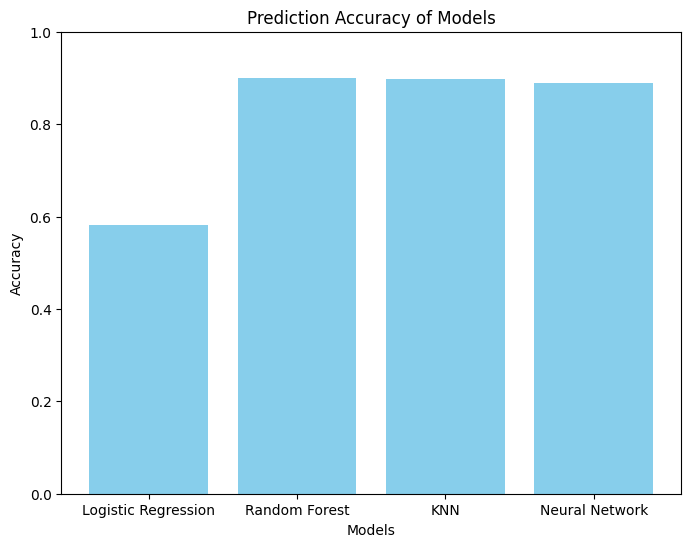

In [143]:
import matplotlib.pyplot as plt

# Sample accuracy values for the models
models = ['Logistic Regression', 'Random Forest', 'KNN', 'Neural Network']
accuracies = [accuracy_score(y_test, y_pred_log), accuracy_score(y_test, y_pred_rf),accuracy_score(y_test, y_pred_knn), accuracy_score(y_test, y_pred_nn)]  # Replace with your actual accuracy values

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color='skyblue')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Prediction Accuracy of Models')
plt.ylim(0, 1)  # Accuracy is between 0 and 1
plt.show()


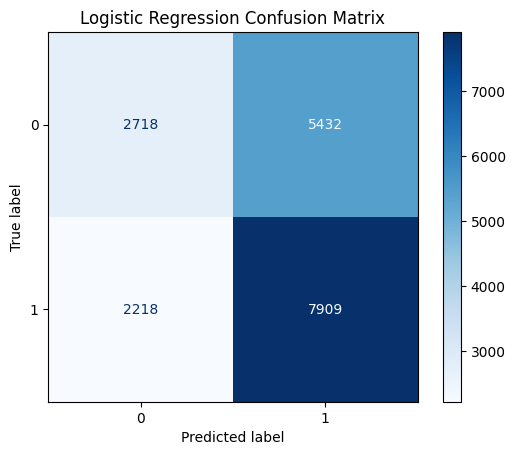

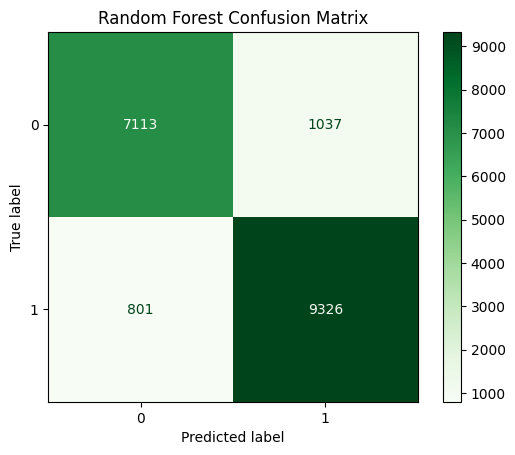

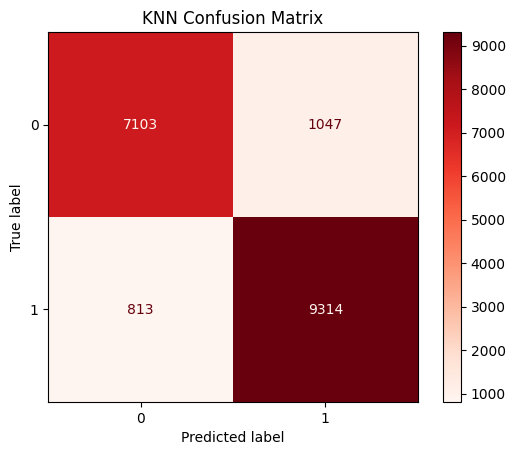

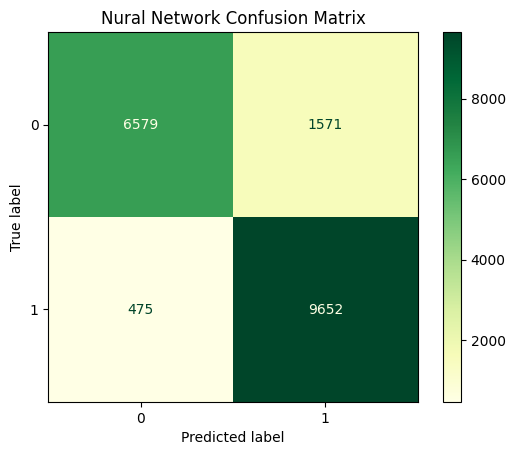

In [144]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt

# Logistic Regression
cm_log = confusion_matrix(y_test, y_pred_log)
ConfusionMatrixDisplay(cm_log).plot(cmap="Blues")
plt.title("Logistic Regression Confusion Matrix")
plt.show()

# Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
ConfusionMatrixDisplay(cm_rf).plot(cmap="Greens")
plt.title("Random Forest Confusion Matrix")
plt.show()

# KNN
cm_knn = confusion_matrix(y_test, y_pred_knn)
ConfusionMatrixDisplay(cm_knn).plot(cmap="Reds")
plt.title("KNN Confusion Matrix")
plt.show()

# Nural Network
cm_nn = confusion_matrix(y_test, y_pred_nn)
ConfusionMatrixDisplay(cm_nn).plot(cmap="YlGn")
plt.title("Nural Network Confusion Matrix")
plt.show()

572/572 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


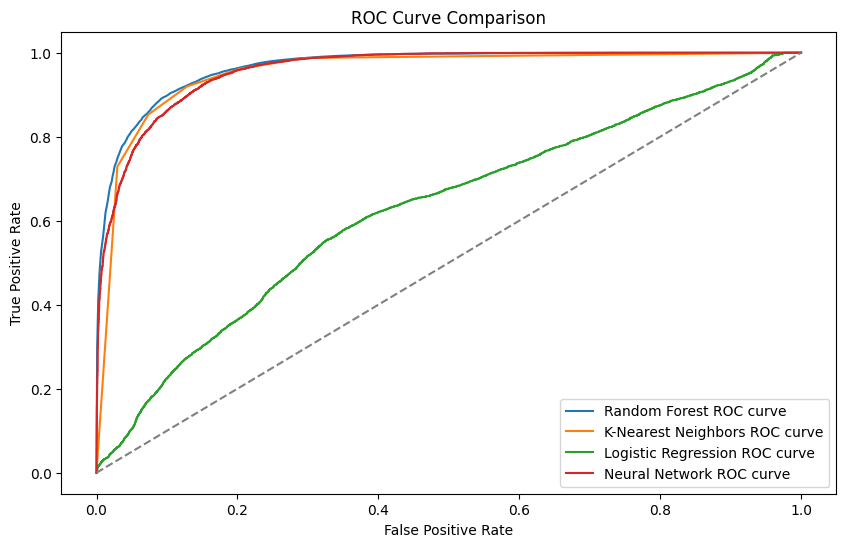

In [145]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

def plot_roc_curve(model, X_test, y_test, model_name):
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
    else:
        y_prob = model.predict(X_test).flatten()

    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f'{model_name} ROC curve')

plt.figure(figsize=(10, 6))
models = {
    "Random Forest": rf_model,
    "K-Nearest Neighbors": knn_model,
    "Logistic Regression": log_model,
    "Neural Network": nn_model
}
for model_name, model in models.items():
    plot_roc_curve(model, X_test, y_test, model_name)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

korle bhalo


In [157]:
data = df.copy()

In [158]:
data.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,1,1.616820,x,g,o,0,e,w,3.082356,0.489669,w,1,g,d,w
1,1,1.871167,x,g,o,0,e,w,3.391996,0.599337,w,1,g,d,u
2,1,1.390945,x,g,o,0,e,w,3.335427,0.554473,w,1,g,d,w
3,1,1.409926,f,h,e,0,e,w,2.731032,0.379004,w,1,p,d,w
4,1,1.499137,x,h,o,0,e,w,2.957308,0.500636,w,1,p,d,w


In [160]:
data.isnull().sum()

,0
class,0
cap-diameter,0
cap-shape,0
cap-surface,0
cap-color,0
does-bruise-or-bleed,0
gill-attachment,0
gill-color,0
stem-height,0
stem-width,0


In [161]:
categorical_cols = data.select_dtypes(include=['object', 'category']).columns

# Display the categorical features
print("Categorical features:", categorical_cols)

Categorical features: Index(['cap-shape', 'cap-surface', 'cap-color', 'gill-attachment',
       'gill-color', 'stem-color', 'ring-type', 'habitat', 'season'],
      dtype='object')


In [162]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'data' is your original DataFrame

# List of columns to be converted to numerical values
categorical_cols = ['cap-shape', 'cap-surface', 'cap-color', 'gill-attachment',
       'gill-color', 'stem-color', 'ring-type', 'habitat', 'season']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to each categorical column
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])

In [163]:
data.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,1,1.616820,6,2,6,0,2,10,3.082356,0.489669,11,1,2,0,3
1,1,1.871167,6,2,6,0,2,10,3.391996,0.599337,11,1,2,0,2
2,1,1.390945,6,2,6,0,2,10,3.335427,0.554473,11,1,2,0,3
3,1,1.409926,2,3,1,0,2,10,2.731032,0.379004,11,1,5,0,3
4,1,1.499137,6,3,6,0,2,10,2.957308,0.500636,11,1,5,0,3


In [166]:
data['unique'] = data[categorical_cols].mean(axis=1)

In [167]:
data.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season,unique
0,1,1.616820,6,2,6,0,2,10,3.082356,0.489669,11,1,2,0,3,4.666667
1,1,1.871167,6,2,6,0,2,10,3.391996,0.599337,11,1,2,0,2,4.555556
2,1,1.390945,6,2,6,0,2,10,3.335427,0.554473,11,1,2,0,3,4.666667
3,1,1.409926,2,3,1,0,2,10,2.731032,0.379004,11,1,5,0,3,4.111111
4,1,1.499137,6,3,6,0,2,10,2.957308,0.500636,11,1,5,0,3,5.111111


In [187]:
X = data.drop(columns=['class'])
X = data[['stem-width', 'stem-height', 'cap-diameter', 'unique']]
y = data['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [188]:
X

,stem-width,stem-height,cap-diameter,unique
0,0.489669,3.082356,1.616820,4.666667
1,0.599337,3.391996,1.871167,4.555556
2,0.554473,3.335427,1.390945,4.666667
3,0.379004,2.731032,1.409926,4.111111
4,0.500636,2.957308,1.499137,5.111111
...,...,...,...,...
61064,-0.594050,-0.794110,-1.055722,4.555556
61065,-0.672811,-1.017409,-1.038639,4.222222
61066,-0.579095,-0.814952,-1.038639,4.777778
61067,-0.671814,-0.904271,-1.044333,4.444444


In [189]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Logistic Regression
log_model = LogisticRegression(max_iter=5000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# KNN
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

# Nural Network
nn_model = Sequential()
nn_model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
nn_model.add(Dense(32, activation='relu'))
nn_model.add(Dense(1, activation='sigmoid'))
nn_model.compile(loss='binary_crossentropy',metrics=['accuracy'])
nn_model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))
y_pred_nn = (nn_model.predict(X_test) > 0.5).astype("int32")

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1333/1333 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.6347 - loss: 0.6394 - val_accuracy: 0.6677 - val_loss: 0.5908
Epoch 2/5
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6821 - loss: 0.5806 - val_accuracy: 0.6911 - val_loss: 0.5627
Epoch 3/5
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6940 - loss: 0.5602 - val_accuracy: 0.7021 - val_loss: 0.5502
Epoch 4/5
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7038 - loss: 0.5491 - val_accuracy: 0.7135 - val_loss: 0.5411
Epoch 5/5
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7093 - loss: 0.5334 - val_accuracy: 0.7124 - val_loss: 0.5351
572/572 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


In [190]:
from sklearn.metrics import accuracy_score
# Accuracy comparison
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Neural Network Accuracy:",accuracy_score(y_test, y_pred_nn))

Logistic Regression Accuracy: 0.5907424632051211
Random Forest Accuracy: 0.8793565683646113
KNN Accuracy: 0.8687421349236746
Neural Network Accuracy: 0.7123707391803906


In [177]:
df3.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,1,1.616820,x,g,o,0,2,w,3.082356,0.489669,w,1,g,d,w
1,1,1.871167,x,g,o,0,2,w,3.391996,0.599337,w,1,g,d,u
2,1,1.390945,x,g,o,0,2,w,3.335427,0.554473,w,1,g,d,w
3,1,1.409926,f,h,e,0,2,w,2.731032,0.379004,w,1,p,d,w
4,1,1.499137,x,h,o,0,2,w,2.957308,0.500636,w,1,p,d,w


In [178]:
dfx = pd.concat([df3[top_features],data['unique']], axis=1)


In [179]:
dfx.head()

,stem-width,stem-height,cap-diameter,gill-attachment,unique
0,0.489669,3.082356,1.616820,2,4.666667
1,0.599337,3.391996,1.871167,2,4.555556
2,0.554473,3.335427,1.390945,2,4.666667
3,0.379004,2.731032,1.409926,2,4.111111
4,0.500636,2.957308,1.499137,2,5.111111


In [192]:
X_train, X_test, y_train, y_test = train_test_split(dfx, y, test_size=0.3, random_state=42)

In [199]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Logistic Regression
log_model = LogisticRegression(max_iter=5000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# KNN
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

# Nural Network
nn_model = Sequential()

# Add 8 layers with alternating ReLU activations
nn_model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))  # Layer 1
nn_model.add(Dense(128, activation='relu'))  # Layer 2
nn_model.add(Dense(128, activation='relu'))  # Layer 3
nn_model.add(Dense(64, activation='relu'))  # Layer 4
nn_model.add(Dense(64, activation='relu'))  # Layer 5
nn_model.add(Dense(32, activation='relu'))  # Layer 6
nn_model.add(Dense(32, activation='relu'))  # Layer 7
nn_model.add(Dense(1, activation='sigmoid'))  # Output Layer

# Compile the model
nn_model.compile(loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model on the training data
nn_model.fit(X_train, y_train, epochs=25, batch_size=32, validation_data=(X_test, y_test))

# Predict the outcomes on the test set
y_pred_nn = (nn_model.predict(X_test) > 0.5).astype("int32")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6645 - loss: 0.5961 - val_accuracy: 0.7645 - val_loss: 0.4527
Epoch 2/25
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7864 - loss: 0.4222 - val_accuracy: 0.8355 - val_loss: 0.3510
Epoch 3/25
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8434 - loss: 0.3402 - val_accuracy: 0.8694 - val_loss: 0.2968
Epoch 4/25
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8724 - loss: 0.2856 - val_accuracy: 0.8821 - val_loss: 0.2710
Epoch 5/25
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8908 - loss: 0.2606 - val_accuracy: 0.8947 - val_loss: 0.2549
Epoch 6/25
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9018 - loss: 0.2375 - val_accuracy: 0.8999 - val_loss: 0.2389
Epoch 7/25
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.9118 - loss: 0.2171 - val_accuracy: 0.9106 - val_loss: 0.2204
Epoch 8/25
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9145 - loss: 0.2110

In [200]:
from sklearn.metrics import accuracy_score
# Accuracy comparison
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Neural Network Accuracy:",accuracy_score(y_test, y_pred_nn))

Logistic Regression Accuracy: 0.5800733161897467
Random Forest Accuracy: 0.9548613010888002
KNN Accuracy: 0.9462712699020627
Neural Network Accuracy: 0.9221425835749849


In [201]:
from sklearn.metrics import classification_report

print("Logistic Regression:")
print(classification_report(y_test, y_pred_log))

print("Random Forest:")
print(classification_report(y_test, y_pred_rf))

print("KNN:")
print(classification_report(y_test, y_pred_knn))

print("Nural Network:")
print(classification_report(y_test, y_pred_nn))

Logistic Regression:
              precision    recall  f1-score   support

           0       0.55      0.35      0.42      8150
           1       0.59      0.77      0.67     10127

    accuracy                           0.58     18277
   macro avg       0.57      0.56      0.55     18277
weighted avg       0.57      0.58      0.56     18277

Random Forest:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      8150
           1       0.95      0.97      0.96     10127

    accuracy                           0.95     18277
   macro avg       0.96      0.95      0.95     18277
weighted avg       0.95      0.95      0.95     18277

KNN:
              precision    recall  f1-score   support

           0       0.94      0.93      0.94      8150
           1       0.95      0.96      0.95     10127

    accuracy                           0.95     18277
   macro avg       0.95      0.95      0.95     18277
weighted avg       0.95      0.95

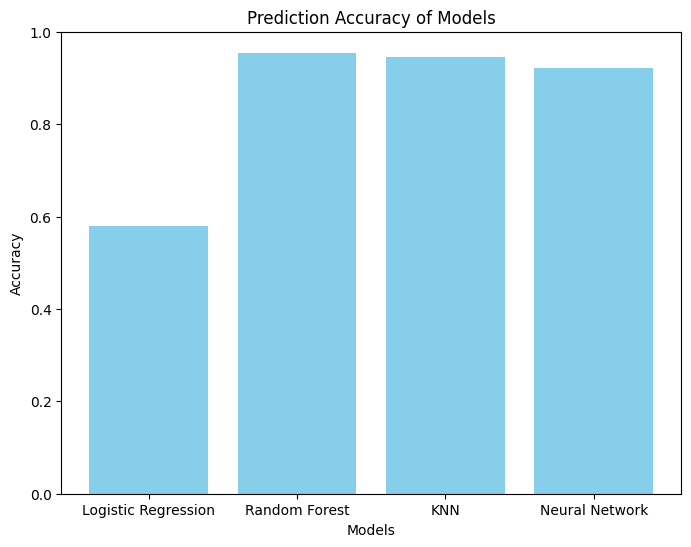

In [202]:
import matplotlib.pyplot as plt

# Sample accuracy values for the models
models = ['Logistic Regression', 'Random Forest', 'KNN', 'Neural Network']
accuracies = [accuracy_score(y_test, y_pred_log), accuracy_score(y_test, y_pred_rf),accuracy_score(y_test, y_pred_knn), accuracy_score(y_test, y_pred_nn)]  # Replace with your actual accuracy values

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color='skyblue')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Prediction Accuracy of Models')
plt.ylim(0, 1)  # Accuracy is between 0 and 1
plt.show()

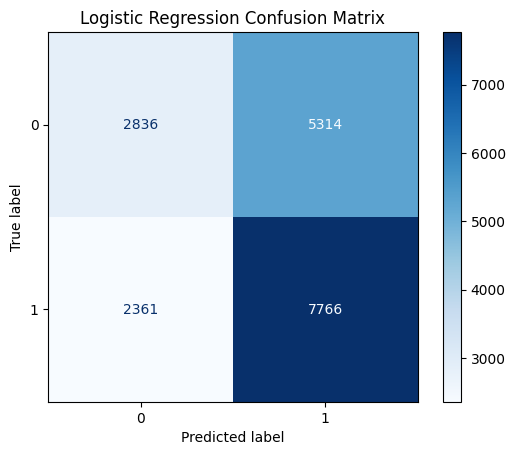

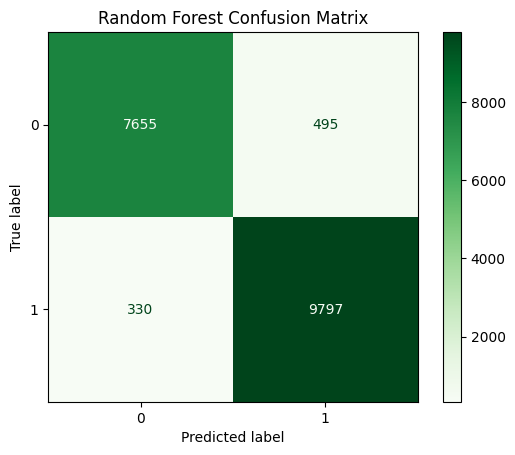

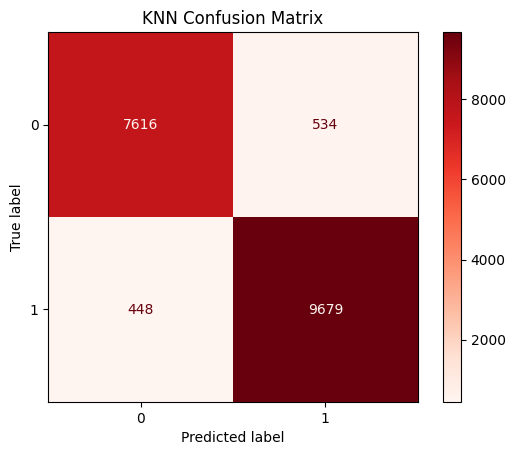

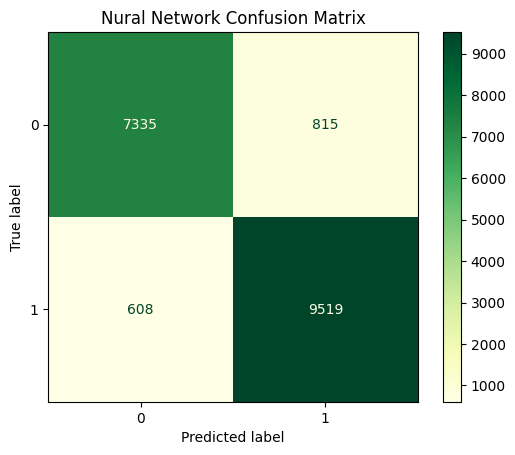

In [203]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt

# Logistic Regression
cm_log = confusion_matrix(y_test, y_pred_log)
ConfusionMatrixDisplay(cm_log).plot(cmap="Blues")
plt.title("Logistic Regression Confusion Matrix")
plt.show()

# Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
ConfusionMatrixDisplay(cm_rf).plot(cmap="Greens")
plt.title("Random Forest Confusion Matrix")
plt.show()

# KNN
cm_knn = confusion_matrix(y_test, y_pred_knn)
ConfusionMatrixDisplay(cm_knn).plot(cmap="Reds")
plt.title("KNN Confusion Matrix")
plt.show()

# Nural Network
cm_nn = confusion_matrix(y_test, y_pred_nn)
ConfusionMatrixDisplay(cm_nn).plot(cmap="YlGn")
plt.title("Nural Network Confusion Matrix")
plt.show()

In [204]:
from sklearn.metrics import classification_report

print("Logistic Regression:")
print(classification_report(y_test, y_pred_log))

print("Random Forest:")
print(classification_report(y_test, y_pred_rf))

print("KNN:")
print(classification_report(y_test, y_pred_knn))

print("Nural Network:")
print(classification_report(y_test, y_pred_nn))

Logistic Regression:
              precision    recall  f1-score   support

           0       0.55      0.35      0.42      8150
           1       0.59      0.77      0.67     10127

    accuracy                           0.58     18277
   macro avg       0.57      0.56      0.55     18277
weighted avg       0.57      0.58      0.56     18277

Random Forest:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      8150
           1       0.95      0.97      0.96     10127

    accuracy                           0.95     18277
   macro avg       0.96      0.95      0.95     18277
weighted avg       0.95      0.95      0.95     18277

KNN:
              precision    recall  f1-score   support

           0       0.94      0.93      0.94      8150
           1       0.95      0.96      0.95     10127

    accuracy                           0.95     18277
   macro avg       0.95      0.95      0.95     18277
weighted avg       0.95      0.95

572/572 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


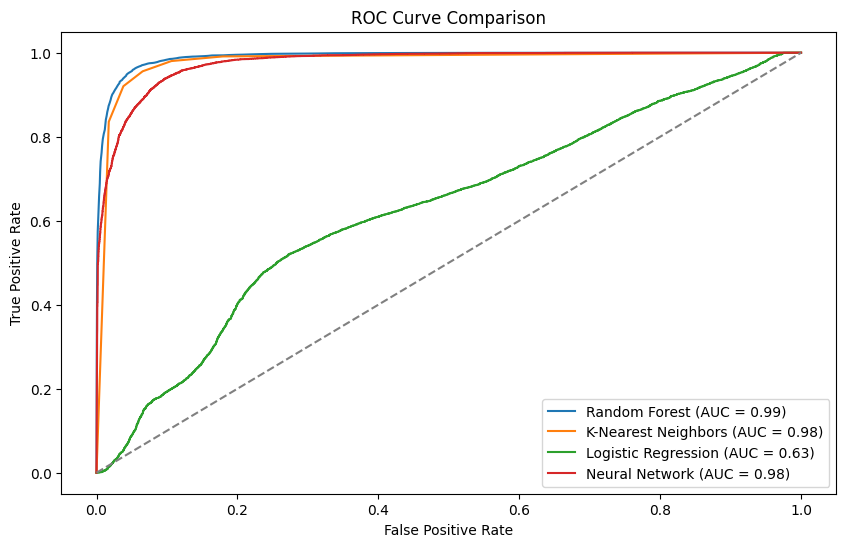

In [206]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

def plot_roc_curve(model, X_test, y_test, model_name):
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
    else:
        y_prob = model.predict(X_test).flatten()

    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc = roc_auc_score(y_test, y_prob)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.2f})')

plt.figure(figsize=(10, 6))
models = {
    "Random Forest": rf_model,
    "K-Nearest Neighbors": knn_model,
    "Logistic Regression": log_model,
    "Neural Network": nn_model
}
for model_name, model in models.items():
    plot_roc_curve(model, X_test, y_test, model_name)

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()
